# Force and motion, system dynamics with interaction
## Lab Exercise 2
#### Develop a model for the motion of a ball. Assuming, when on a windless day, someone standing on a bridge holds a ball over the side and tosses the ball straight up into the air. Ignore the modelling of friction (see the diagram below) in this example.

#### a)

In [14]:
def simBallFallingNoFriction(initPos, gravity, simLength):
    t_array, v_array, s_array = [],[],[]
    v = gravity
    s = initPos
    for t in range(simLength):
        
        t_array.append(t)
        v_array.append(v)
        
        # Change in postion
        s = s + v 
        if s < 0:
            s_array.append(0)
            return t_array, v_array, s_array
        s_array.append(s)
        
        # Change in velocity
        v = v + gravity # Velocity + acceleration (gravity, no friction)

    return t_array, v_array, s_array
# No Friction
s = 10000   # Position in (m). Change in pos is r v
#v = ds/dt # Velocity, v(t) = ds/dt
#a = dv/dt # Acceleration, a(t) = dv/dt
gravity = -9.81 # (m/sec2)
simLength = 60 # seconds

t_array, v_array, s_array = simBallFallingNoFriction(s, gravity, simLength)

import pandas as pd
ballFallNoF = pd.DataFrame()
ballFallNoF.insert(loc=0, column="time(s)", value=t_array)
ballFallNoF.insert(loc=1, column="position(m)", value=s_array)
ballFallNoF

,time(s),position(m)
0,0,9990.19
1,1,9970.57
2,2,9941.14
3,3,9901.90
4,4,9852.85
5,5,9793.99
6,6,9725.32
7,7,9646.84
8,8,9558.55
9,9,9460.45


###### b)

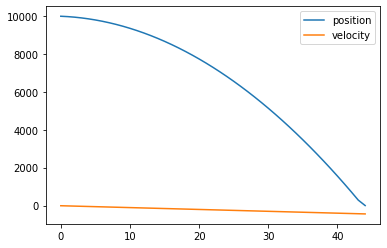

In [5]:
import matplotlib.pyplot as plt

plt.plot(t_array, s_array, label="position")
plt.plot(t_array, v_array, label="velocity")
plt.legend()
plt.show()

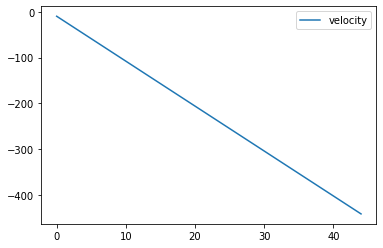

In [6]:
plt.plot(t_array, v_array, label="velocity")
plt.legend()
plt.show()

#### Lecture Exercise 1

In [15]:
# Force due to gravity: Netwons second law 
# F = m * a
# m = F / a
# a = F / m
# Exercise
# 
F = 981 # Newtons
a = 9.81 # Gravity
m = F / 9.81
print("The mass of an object that weights 981 N")
print(m, "kg")

F = 10
m = 5
a = F / m
print("The acceleration that results when a net force of 10 N is applied to an object with the mass 5 kg")
print(a, "m/s^2")
# wooooo, got it right.

The mass of an object that weights 981 N
100.0 kg
The acceleration that results when a net force of 10 N is applied to an object with the mass 5 kg
2.0 m/s^2


In [ ]:
# Kinetic friction or drag
## Estimates

### Stokes' friction, small object through air?
# F = k * v
# k, kg/sec, constant of proportionality
# v in m/sec, velocity

### Newtonian friction through air, bigger solid objects through air?
##### what defines "bigger" ?
# F = F = 0.65 * A * v^2 (v*v)
# A: Objects projected area in direction of movement PI * RADIUS^2
# v in m/sec, velocity

In [81]:
# Not including a time step as 1 sec is sufficent 
def simBallFallingWithFriction(m, r, v, gravity, s, simLength):
    t_array, v_array, s_array = [],[],[]
    
    weight = m * gravity
    projected_area = 3.14159 * (r * r)
    for t in range(simLength): # dT = 1
        
        air_friction = -0.65 * projected_area * (v * v)
        
        total_force = weight + air_friction
        a = total_force / m 

        change_in_velocity = a
          
        t_array.append(t)
      
        v = v + change_in_velocity # Velocity + acceleration
        
        change_in_position = v  
        
        v_array.append(v)
        # Change in postion
        s = s + change_in_position
        if s < 0:
            s_array.append(0)
        else:
            s_array.append(s)
    return t_array, v_array, s_array

gravity = -9.81 # (m/sec2)
initV = 0
s = 4000   # Position in (m)
simLength = 600 # seconds

t_array, v_array, s_array = simBallFallingWithFriction(0.5, 0.05, initV, gravity, s, simLength)
t_array, v2_array, s_array = simBallFallingWithFriction(0.5, 0.05, initV, gravity, s, simLength)

import pandas as pd
# ballFallF = pd.DataFrame()
# ballFallF.insert(loc=0, column="time(s)", value=t_array)
# ballFallF.insert(loc=1, column="v", value=v_array)
# ballFallF.insert(loc=2, column="position(m)", value=s_array)
# ballFallF

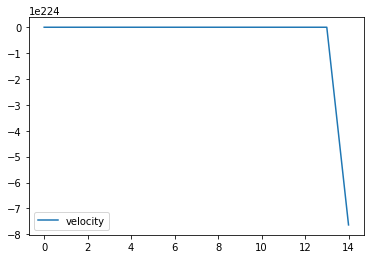

In [82]:
plt.plot(t_array, v_array, label="velocity")
#plt.plot(t_array, v2_array, label="vel2")
plt.legend()
plt.show()